# (1) 物体検出の分野にはどういった手法が存在したか。

RCNN、Fast R-CNNなどの手法がある  

Object proposal methods were adopted as external modules independent of the detectors (e.g., Selective Search [4] object detectors, RCNN [5], and Fast R-CNN [2]).

# (2) Fasterとあるが、どういった仕組みで高速化したのか。

「R-CNN」や「Fast R-CNN」では、処理速度のかかる「selective search」と呼ばれているアルゴリズムでオブジェクトの位置を決め、  
畳み込みニューラルネットワーク（CNN）でオブジェクトのクラスを判定している。  
一方で「Faster R-CNN」では、オブジェクトの位置とオブジェクトのクラス判定の両方をCNN で行い、処理速度を短縮させた。  

Abstract—State-of-the-art object detection networks depend on region proposal algorithms to hypothesize object locations. Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck. In this work, we introduce a Region Proposal Network (RPN) that shares full-image convolutional features with the detection network, thus enabling nearly cost-free region proposals. An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. The RPN is trained end-to-end to generate high-quality region proposals, which are used by Fast R-CNN for detection. We further merge RPN and Fast R-CNN into a single network by sharing their convolutional features—using the recently popular terminology of neural networks with “attention” mechanisms, the RPN component tells the unified network where to look. For the very deep VGG-16 model [3], our detection system has a frame rate of 5fps (including all steps) on a GPU, while achieving state-of-the-art object detection accuracy on PASCAL VOC 2007, 2012, and MS COCO datasets with only 300 proposals per image. In ILSVRC and COCO 2015 competitions, Faster R-CNN and RPN are the foundations of the 1st-place winning entries in several tracks. Code has been made publicly available.

3 FASTER R-CNN Our object detection system, called Faster R-CNN, is composed of two modules. The first module is a deep fully convolutional network that proposes regions, and the second module is the Fast R-CNN detector [2] that uses the proposed regions. The entire system is a single, unified network for object detection (Figure 2). Using the recently popular terminology of neural networks with ‘attention’ [31] mechanisms, the RPN module tells the Fast R-CNN module where to look. In Section 3.1 we introduce the designs and properties of the network for region proposal. In Section 3.2 we develop algorithms for training both modules with features shared.

# (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

1ステージはクラス固有の検出パイプラインであり、2ステージはクラスにとらわれない提案とクラス固有の検出で構成される。  

OverFeat is a one-stage, class-specific detection pipeline, and ours is a two-stage cascade consisting of class-agnostic proposals and class-specific detections.

# (4) RPNとは何か。

最新のオブジェクト検出ネットワークと畳み込み層を共有する新しい領域提案ネットワーク  

To this end, we introduce novel Region Proposal Networks (RPNs) that share convolutional layers with state-of-the-art object detection networks [1], [2]. By sharing convolutions at test-time, the marginal cost for computing proposals is small (e.g., 10ms per image).

# (5) RoIプーリングとは何か。

RoIプーリングを施すことによって、有効な関心領域内のフィーチャをH×Wの固定空間範囲（たとえば、7×7）の小さなフィーチャマップに変換する。  

[2] R. Girshick, “Fast R-CNN,” in IEEE International Conference on Computer Vision (ICCV), 2015.
The RoI pooling layer uses max pooling to convert the features inside any valid region of interest into a small feature map with a fixed spatial extent of H × W (e.g., 7 × 7), where H and W are layer hyper-parameters that are independent of any particular RoI. In this paper, an RoI is a rectangular window into a conv feature map. Each RoI is defined by a four-tuple (r, c, h, w) that specifies its top-left corner (r, c) and its height and width (h, w).

# (6) Anchorのサイズはどうするのが適切か。

Anchorは、scaleとaspect ratioの２つのハイパーパラメータがあり、感度分析の要領でそれぞれの条件を変えて決めた。  

- 「1 scale, 1 ratio」では、mAPは65.8%と一番よくない。  
- 「3 scales, 1 ratio」でも、「3 scales, 3 ratios」とほぼ同等のmAPが得られている。  

In Table 8 we investigate the settings of anchors. By default we use 3 scales and 3 aspect ratios (69.9% mAP in Table 8).[p9, 左カラム, Sensitivities to Hyperparameters]  
Using just 3 scales with 1 aspect ratio (69.8%) is as good as using 3 scales with 3 aspect ratios on this dataset, suggesting that scales and aspect ratios are not disentangled dimensions for the detection accuracy. But we still adopt these two dimensions in our designs to keep our system flexible.[p9, 右カラム]

# (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。

PASCAL VOC 2007、PASCAL VOC 2012、MS COCOを使用し、maPが向上した。

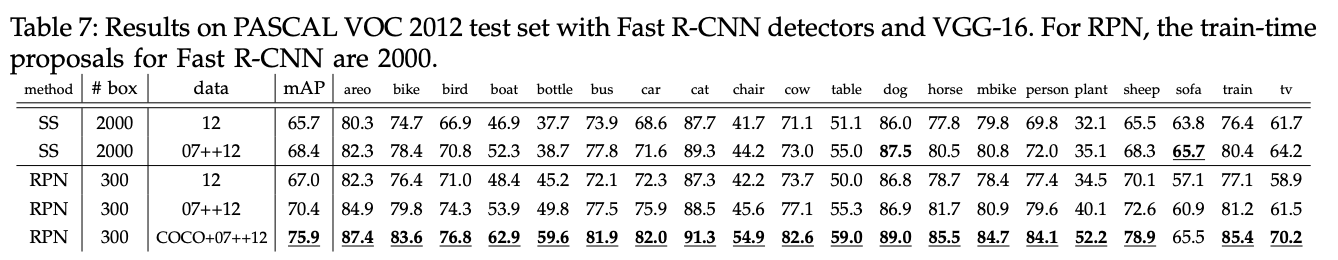